**Plot matrices** are great for comparing multiple values with each other without the need of doing a bivariate analysis for each pair. Each row and column represents a different variable, a subplot against each variable is created in each plot matrix cell. This is different to faceting where the rows and columns subset the data but the same variables are depicted for each subplot.

 

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

# Load dataset

In [2]:
df = pd.read_csv('fuel-econ.csv')

## Creating a transmission type dataset

In [3]:
df['trans_type'] = df['trans'].apply(lambda x:x.split()[0])

# Plot 1: Fuel Efficiency Stats Matrix

By default, seaborn's `PairGrid()` only depicts numeric variables. On the diagonals, histograms are plotted while off the diagonals a scatterplot  between two variables is created.

''

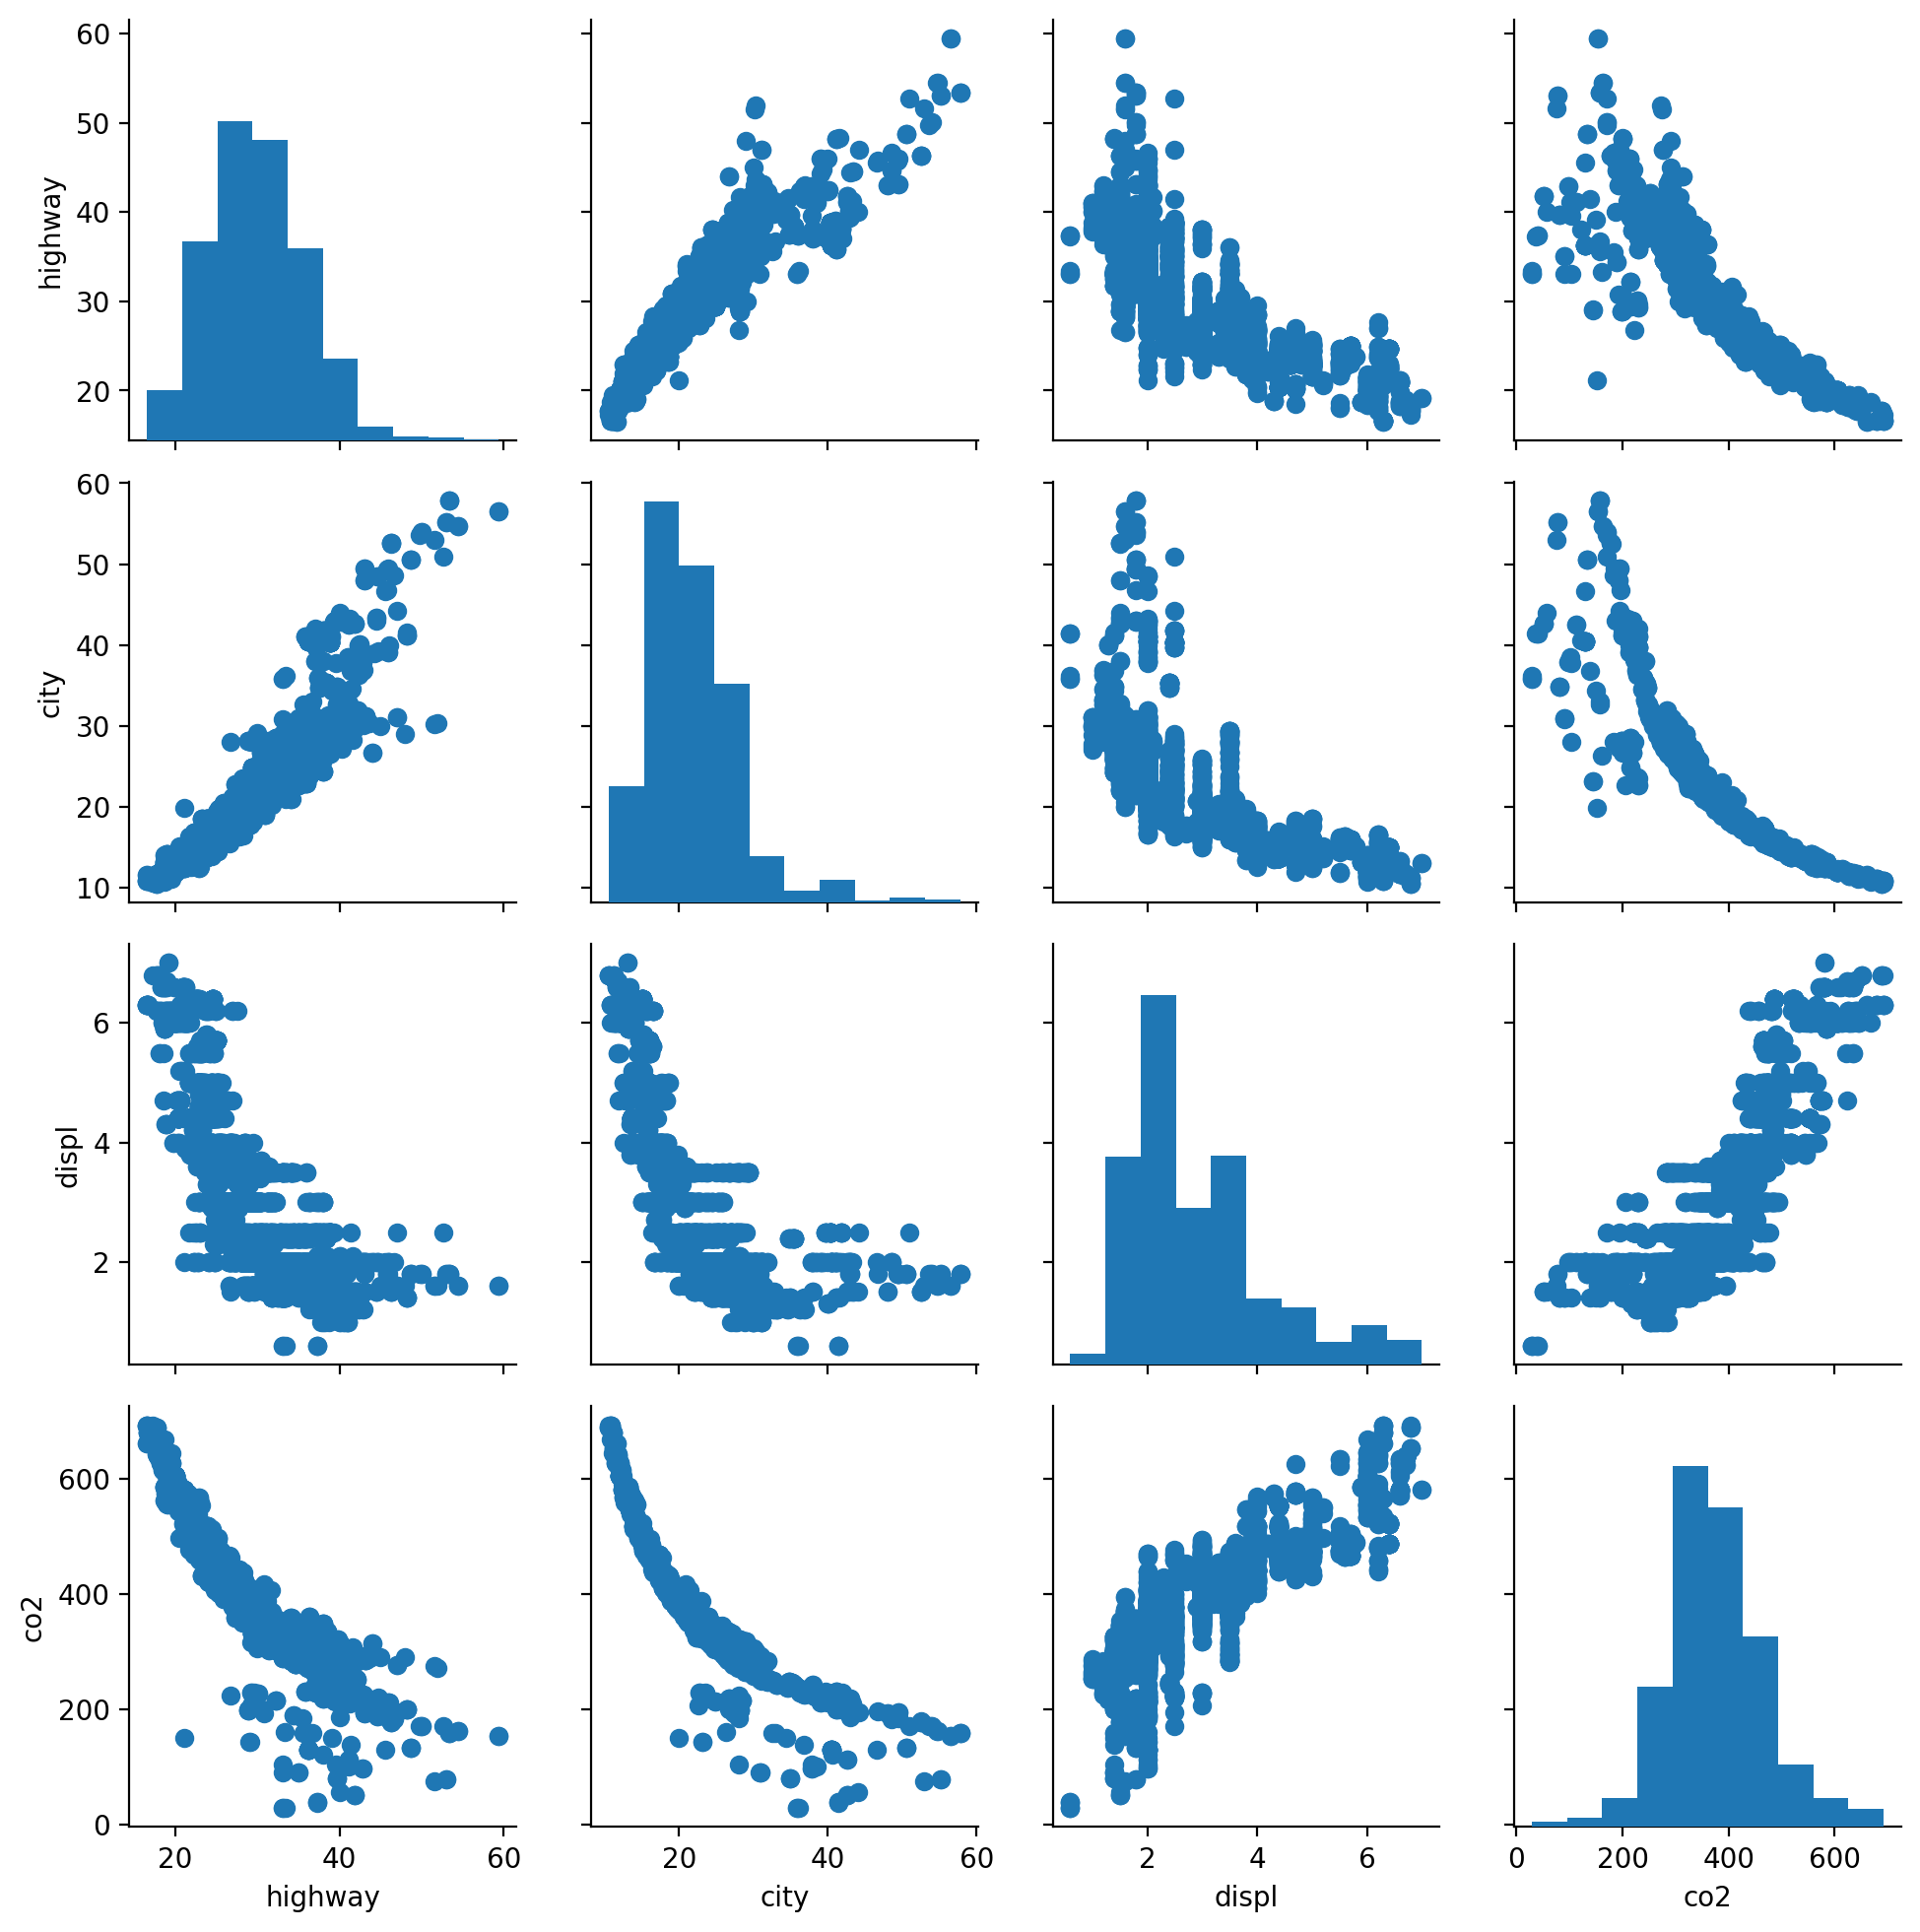

In [33]:
stats = ['highway', 'city', 'displ', 'co2']

g = sns.PairGrid(data=df, vars=stats)#The use of vars=stats is to only focus on 4 variables instead of the entire dataset, to save time and computation power
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist)

; 

# Plot 2: Stats Correlation Heatmap Matrix

''

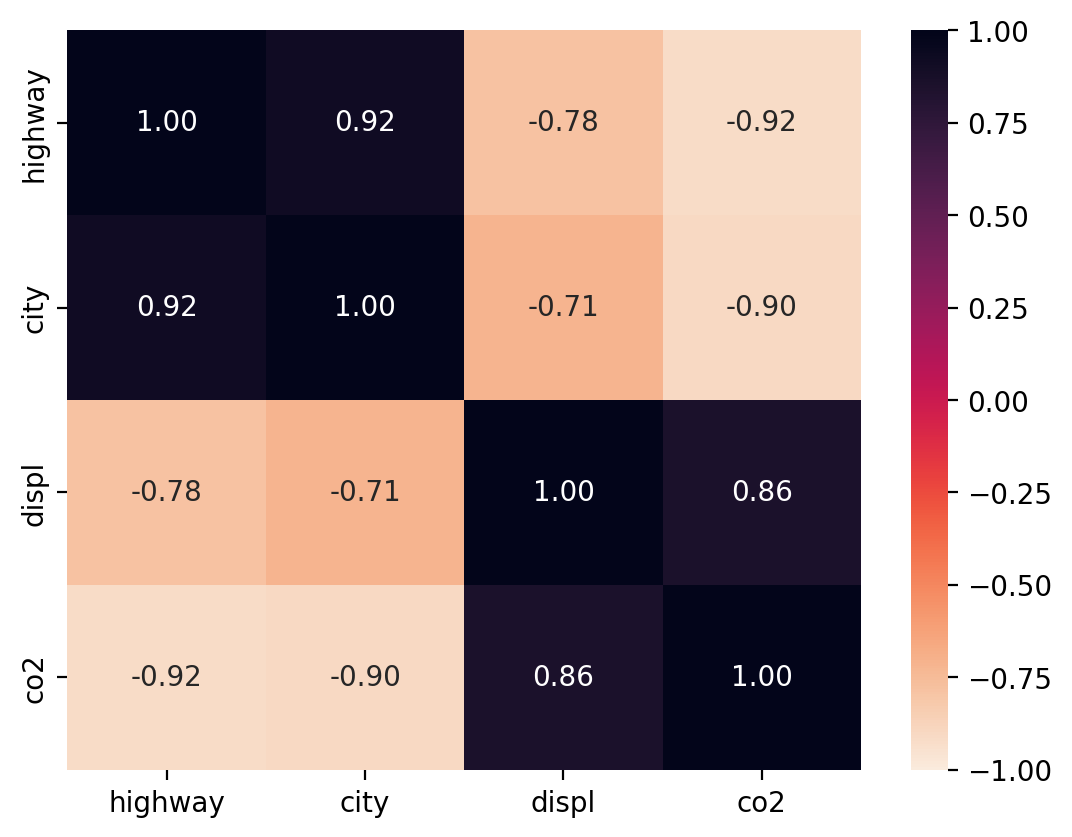

In [9]:
sns.heatmap(df[stats].corr(), cmap='rocket_r', annot=True, fmt='.2f', vmin=-1)#.corr() is for correlation matrix
;

# Pair Grid with Violen Plots

''

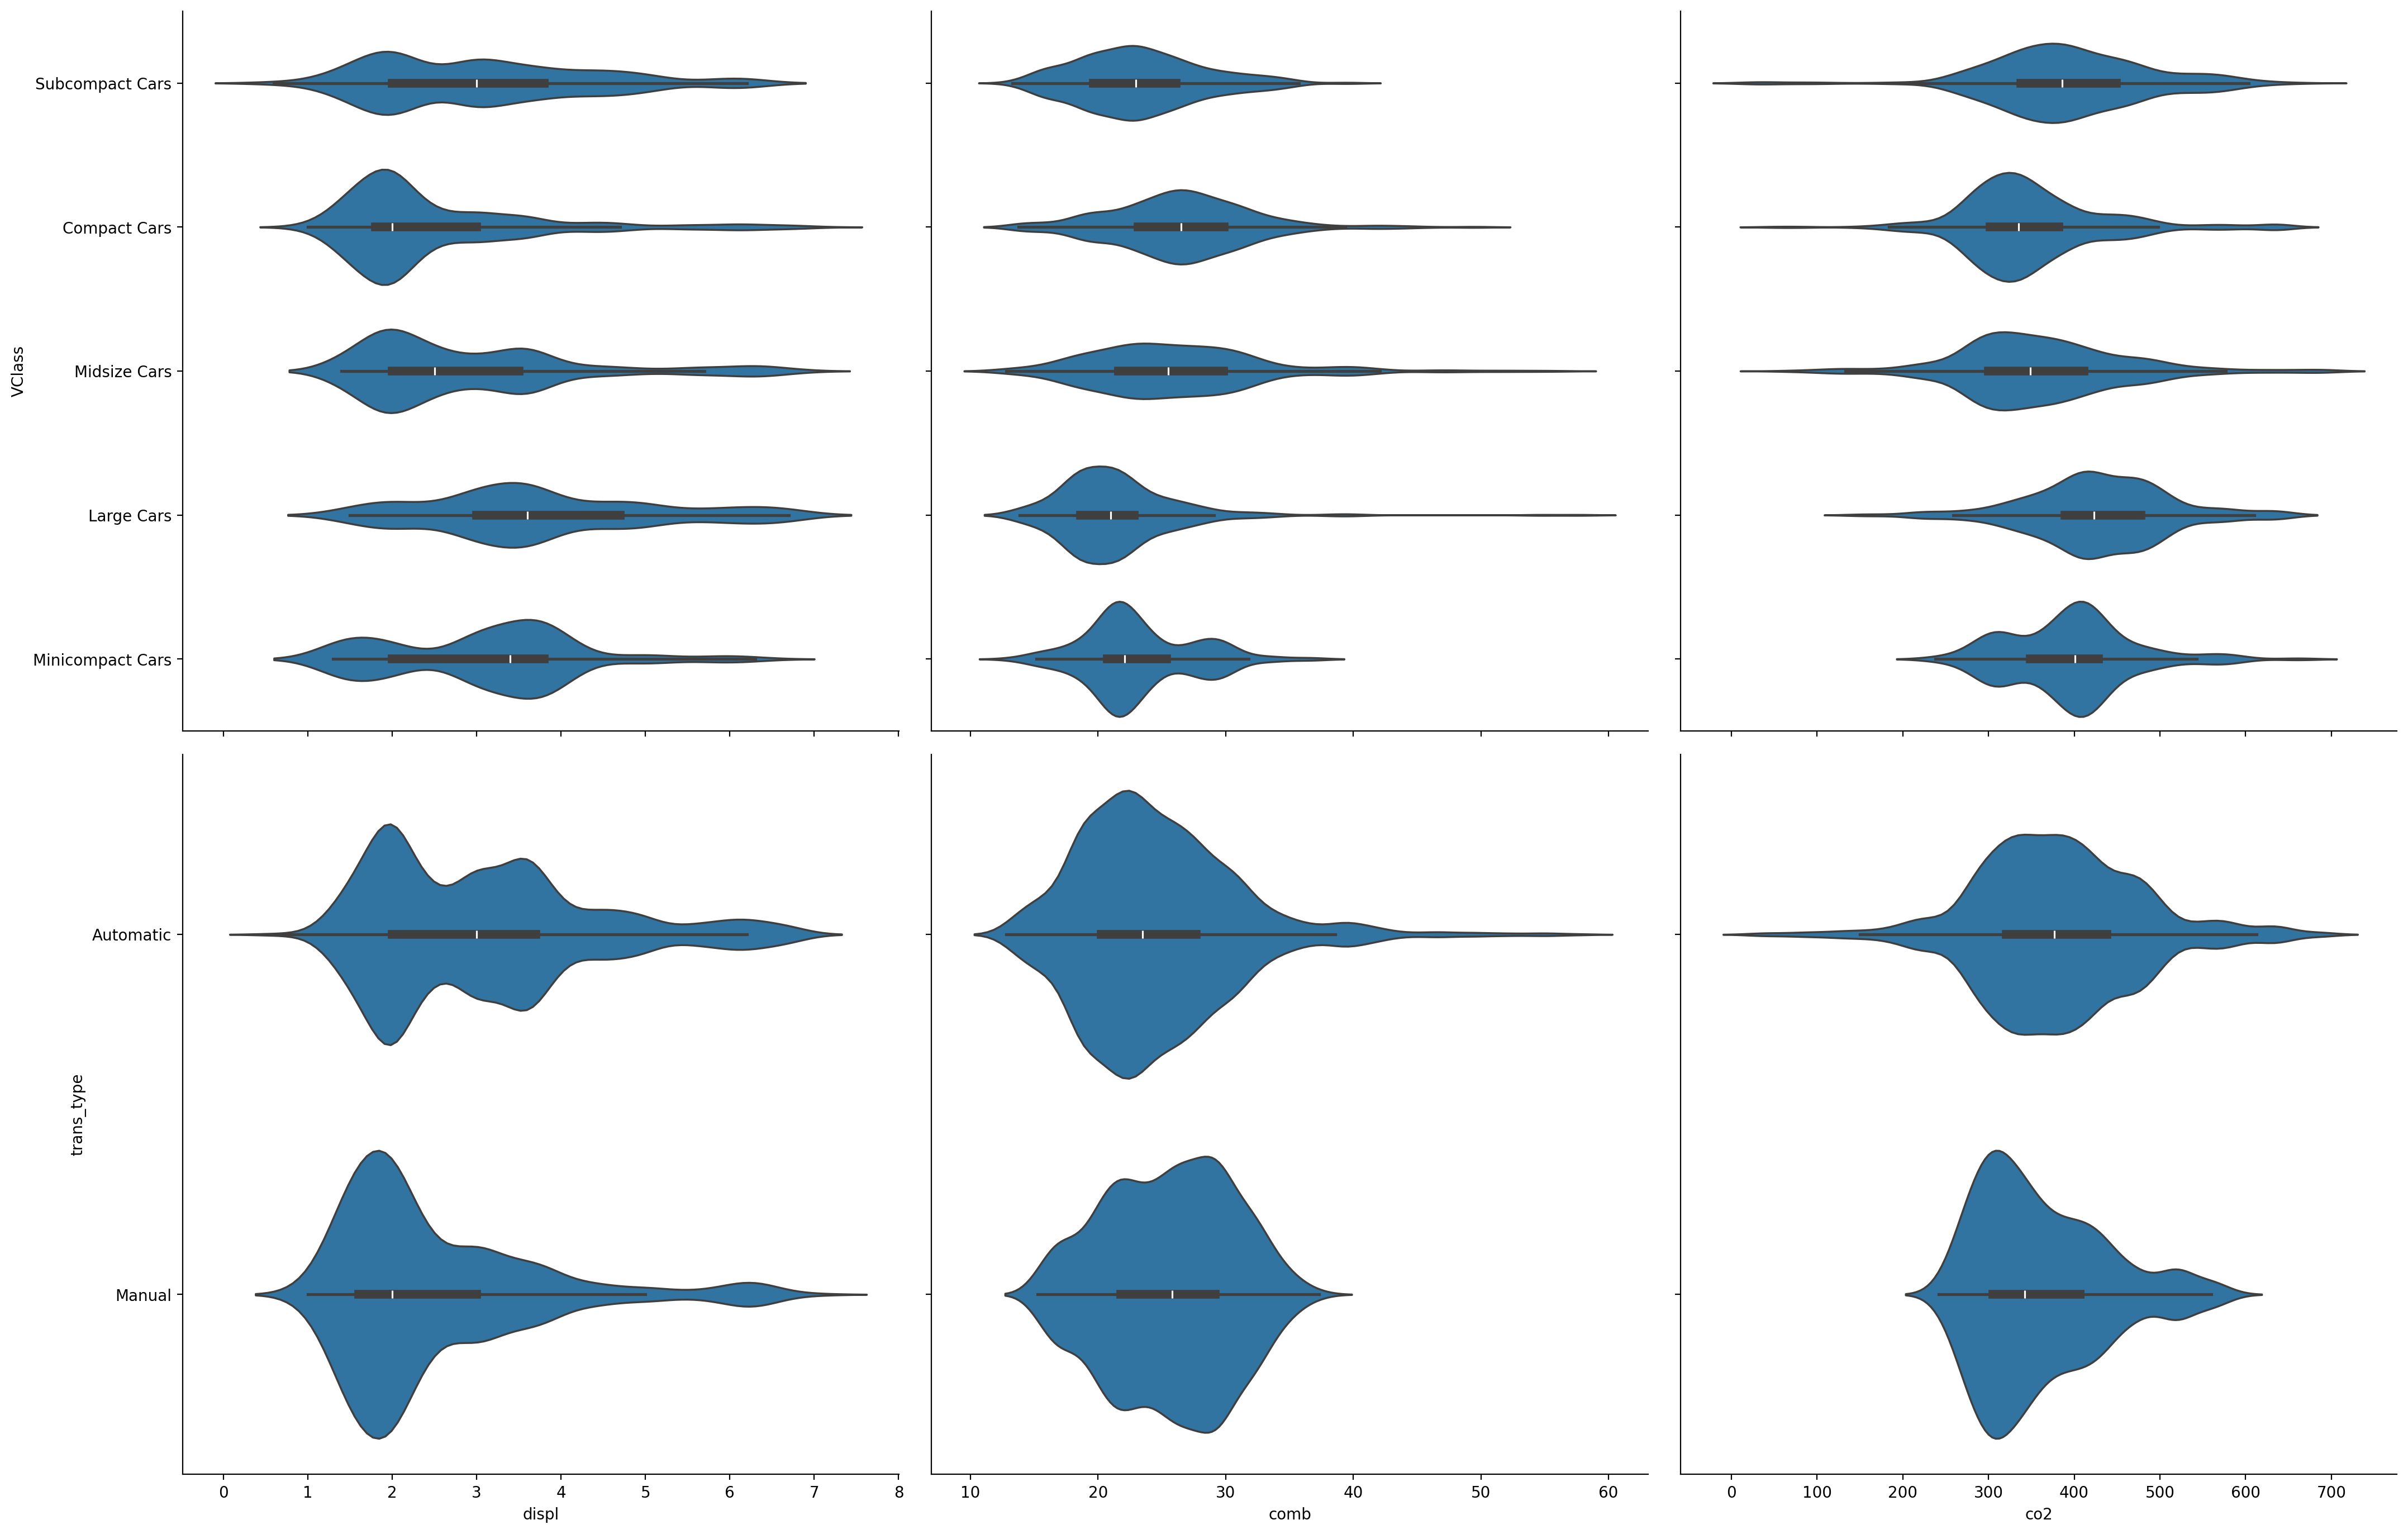

In [14]:
g = sns.PairGrid(data=df, x_vars=['displ','comb','co2'], y_vars=['VClass', 'trans_type'], height=7)
g.map(sns.violinplot)
;

''

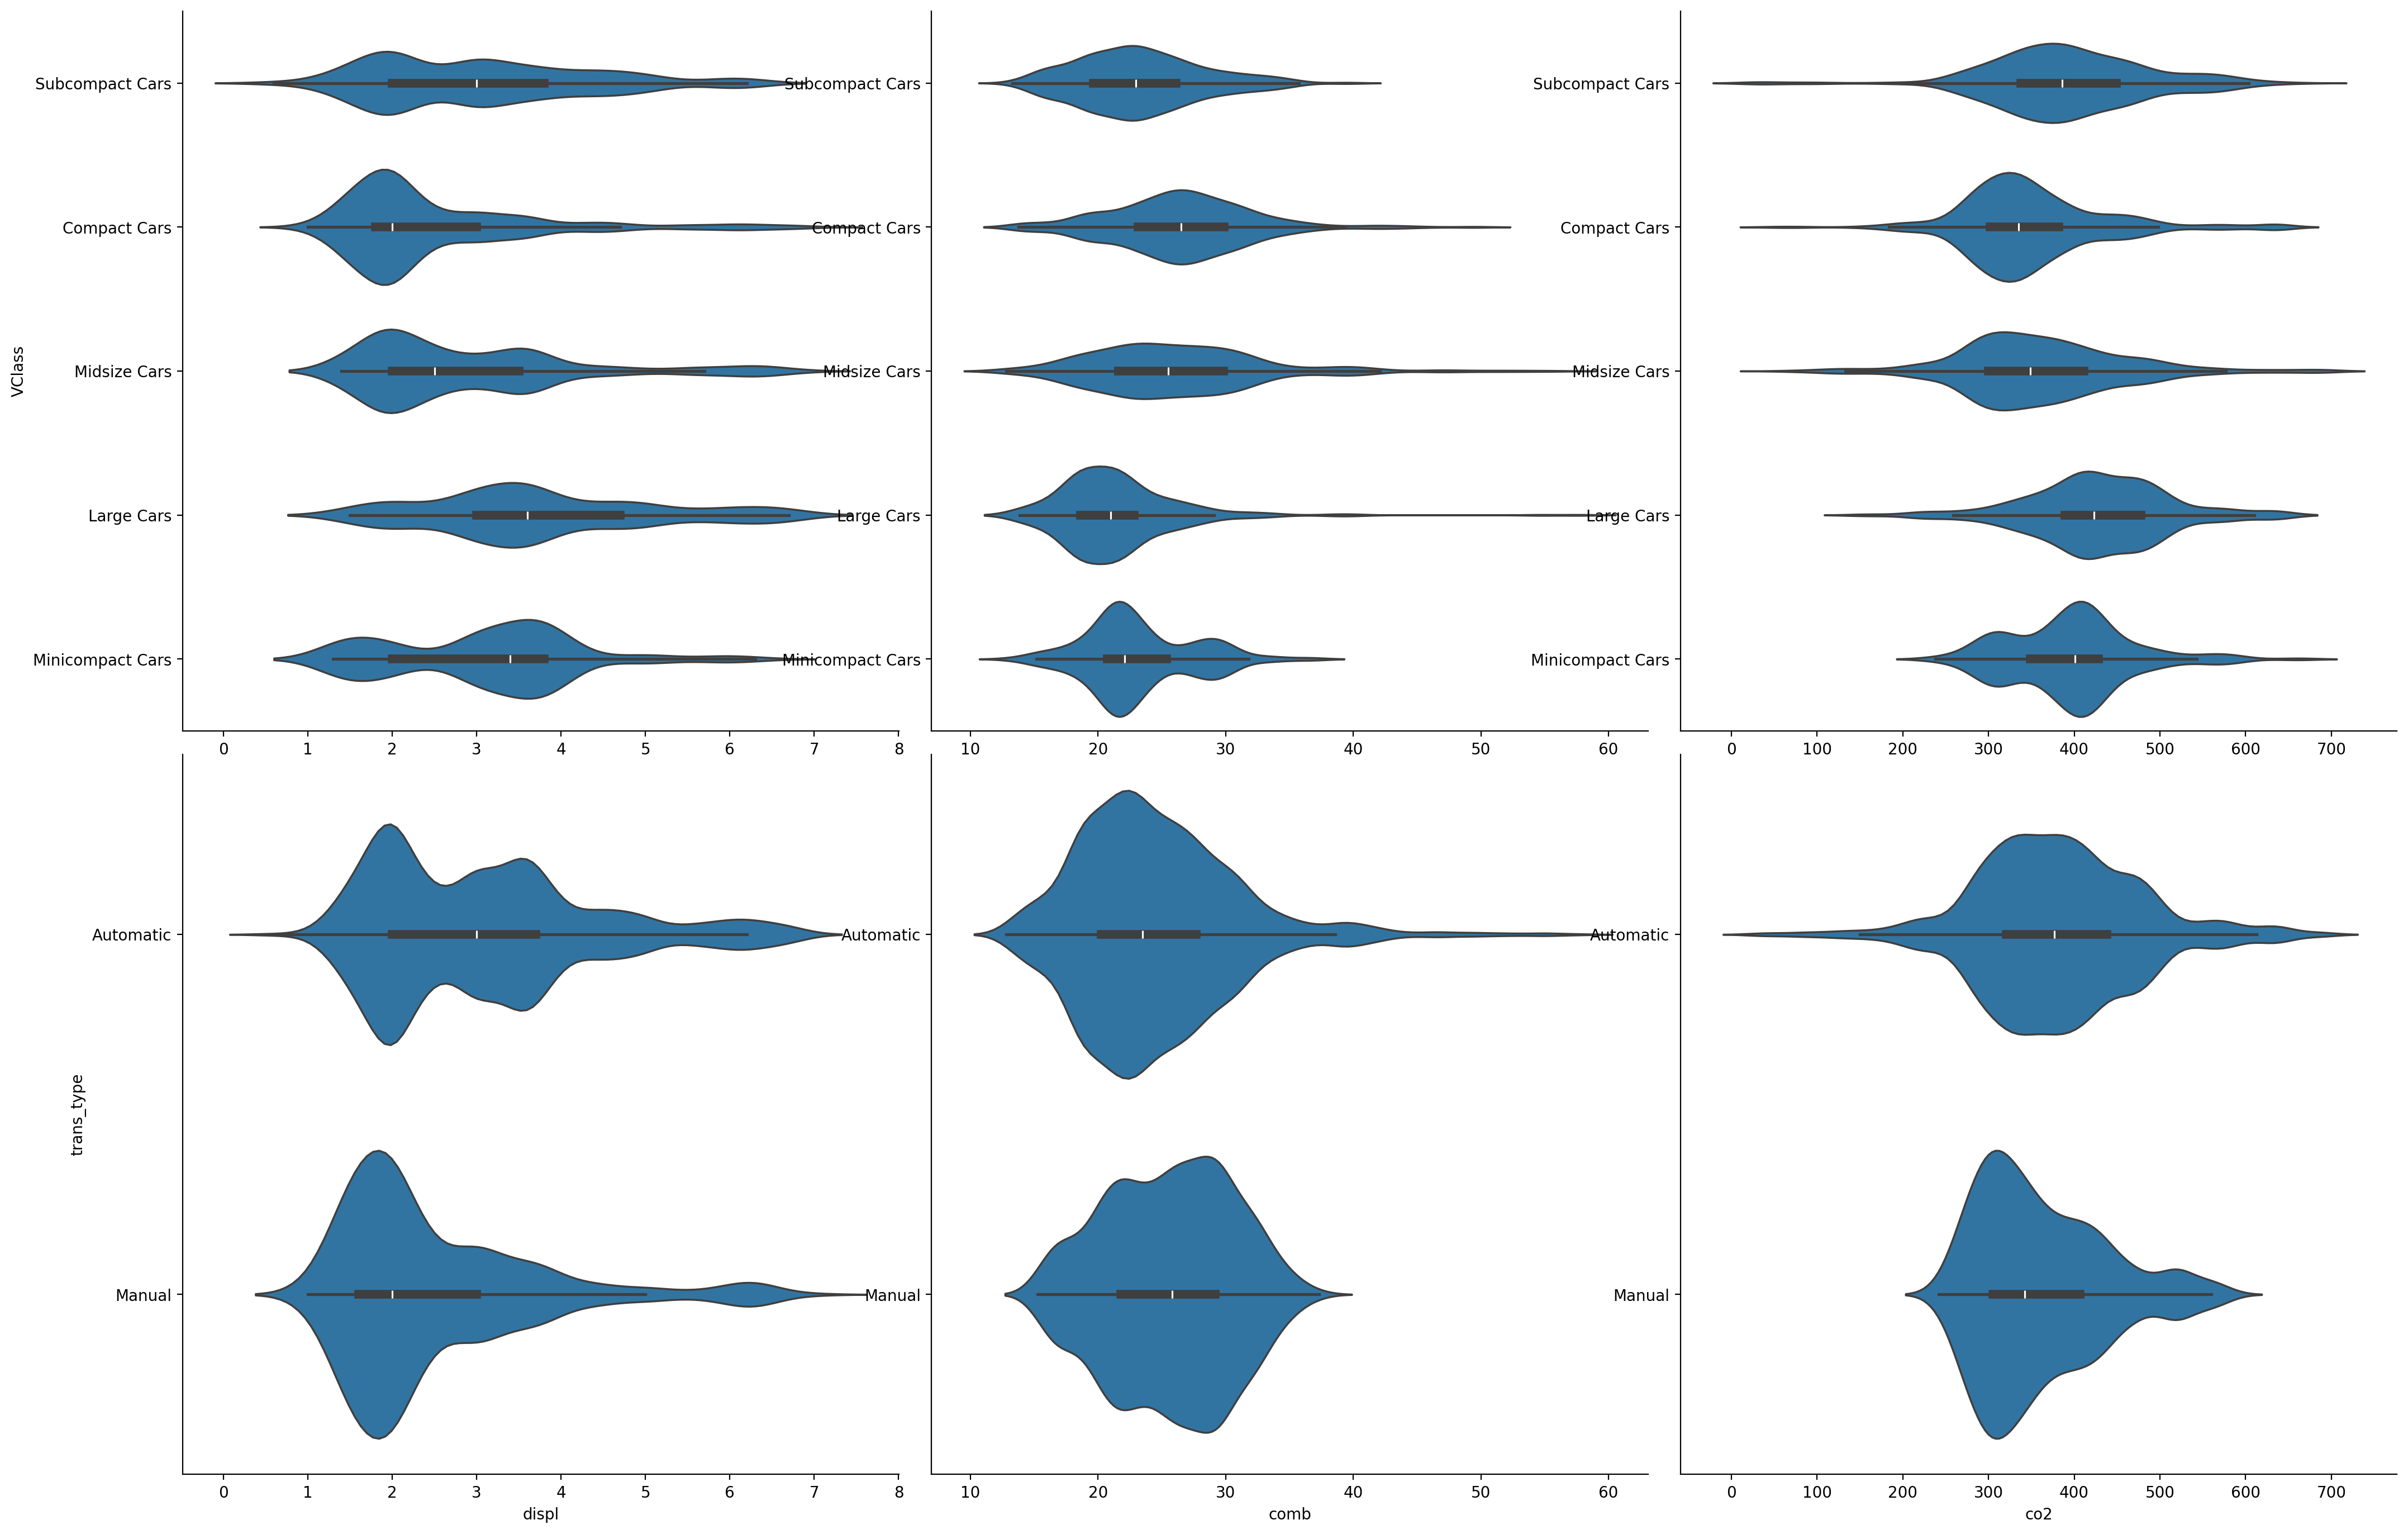

In [32]:
g = sns.PairGrid(data=df, x_vars=['displ','comb','co2'], y_vars=['VClass', 'trans_type'], height=7)
g.map(sns.violinplot)

for ax in g.axes.flat:
    ax.tick_params(axis='x',labelbottom=True)
    ax.tick_params(axis='y', labelleft=True)
;